###

### Dataset Load

In [1]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
!pip install pycocotools

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975 (from 1)
Receiving objects: 100% (975/975), 11.72 MiB | 11.49 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build/temp.linux-x86_64-cpython-310/../common
creating build/temp.linux-x86_64-cpython-310/pycocotools
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werro

In [2]:
# coco - val2017 이미지 캡션 다운로드
!mkdir -p coco_dataset
!wget -c http://images.cocodataset.org/zips/val2017.zip -P coco_dataset/
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P coco_dataset/

!unzip coco_dataset/val2017.zip -d coco_dataset/
!unzip coco_dataset/annotations_trainval2017.zip -d coco_dataset/


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: coco_dataset/val2017/000000365745.jpg  
 extracting: coco_dataset/val2017/000000320425.jpg  
 extracting: coco_dataset/val2017/000000481404.jpg  
 extracting: coco_dataset/val2017/000000314294.jpg  
 extracting: coco_dataset/val2017/000000335328.jpg  
 extracting: coco_dataset/val2017/000000513688.jpg  
 extracting: coco_dataset/val2017/000000158548.jpg  
 extracting: coco_dataset/val2017/000000132116.jpg  
 extracting: coco_dataset/val2017/000000415238.jpg  
 extracting: coco_dataset/val2017/000000321333.jpg  
 extracting: coco_dataset/val2017/000000081738.jpg  
 extracting: coco_dataset/val2017/000000577584.jpg  
 extracting: coco_dataset/val2017/000000346905.jpg  
 extracting: coco_dataset/val2017/000000433980.jpg  
 extracting: coco_dataset/val2017/000000228144.jpg  
 extracting: coco_dataset/val2017/000000041872.jpg  
 extracting: coco_dataset/val2017/000000117492.jpg  
 extracting: coco_dataset/val2017/000000368900.jpg  
 extractin

In [3]:
from pycocotools.coco import COCO
import os
import json

# set data path
coco_images_dir = "./coco_dataset/val2017"
coco_annotations_path = "./coco_dataset/annotations/captions_val2017.json"

# COCO caption 로드
coco = COCO(coco_annotations_path)

# 부정 caption 생성
annotations = []
for ann in coco.loadAnns(coco.getAnnIds()):
    positive_caption = ann['caption']
    negative_caption = f"This is not {positive_caption.lower()}"
    annotations.append({
        "image_id": ann['image_id'],
        "positive_caption": positive_caption,
        "negative_caption": negative_caption
    })

# 결과 JSON 저장
output_path = "./coco_dataset/captions_val2017_with_negatives.json"
with open(output_path, 'w') as f:
    json.dump(annotations, f)

print(f"Total captions generated: {len(annotations)}")
print(f"Updated captions saved to {output_path}")


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Total captions generated: 25014
Updated captions saved to ./coco_dataset/captions_val2017_with_negatives.json


In [4]:
# datasize 체크
!ls coco_dataset/val2017 | wc -l

# 샘플 5개 뽑기
!ls coco_dataset/val2017 | head -n 5


5000
000000000139.jpg
000000000285.jpg
000000000632.jpg
000000000724.jpg
000000000776.jpg


In [5]:
import json

# 부정 캡션 포함 파일 로드
with open('./coco_dataset/captions_val2017_with_negatives.json', 'r') as f:
    annotations = json.load(f)

# 샘플 데이터 출력
for ann in annotations[:5]:
    print(f"Image ID: {ann['image_id']}")
    print(f"Positive Caption: {ann['positive_caption']}")
    print(f"Negative Caption: {ann['negative_caption']}")
    print("-" * 50)


Image ID: 179765
Positive Caption: A black Honda motorcycle parked in front of a garage.
Negative Caption: This is not a black honda motorcycle parked in front of a garage.
--------------------------------------------------
Image ID: 179765
Positive Caption: A Honda motorcycle parked in a grass driveway
Negative Caption: This is not a honda motorcycle parked in a grass driveway
--------------------------------------------------
Image ID: 190236
Positive Caption: An office cubicle with four different types of computers.
Negative Caption: This is not an office cubicle with four different types of computers.
--------------------------------------------------
Image ID: 331352
Positive Caption: A small closed toilet in a cramped space.
Negative Caption: This is not a small closed toilet in a cramped space.
--------------------------------------------------
Image ID: 517069
Positive Caption: Two women waiting at a bench next to a street.
Negative Caption: This is not two women waiting at a b

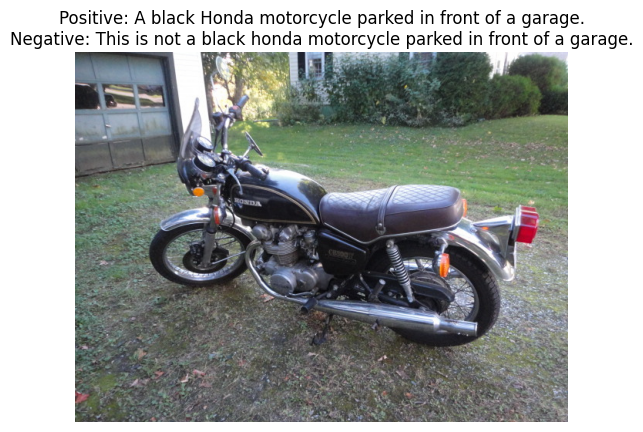

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# 샘플 이미지 및 캡션 출력
sample = annotations[0]
image_id = sample['image_id']
image_path = os.path.join('./coco_dataset/val2017', f"{str(image_id).zfill(12)}.jpg")

# 시각화
image = Image.open(image_path)
plt.imshow(image)
plt.title(f"Positive: {sample['positive_caption']}\nNegative: {sample['negative_caption']}")
plt.axis('off')
plt.show()


### CLIP model

In [ ]:
#install CLIP
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-g4kyf5iv
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-g4kyf5iv
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


## CLIP 유사도 계산
- cosine similarity
- dot product

### cosine similarity

In [ ]:
import torch
import clip
from PIL import Image
from tqdm import tqdm
import pandas as pd


# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "ViT-L/14@336px"  # 이 스크립트는 ViT-L/14@336px 백본 사용

# JSON 파일 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'  # 이미지 디렉토리

# JSON 데이터 로드
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 모델 및 전처리기 로드
print(f"Processing backbone: {backbone}")
model, preprocess = clip.load(backbone, device=device)

# 결과 저장
similarities = []
for ann in tqdm(annotations, total=len(annotations)):
    # 이미지 경로 생성
    image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")

    # 파일 확인
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    # 이미지 로드 및 전처리
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # 텍스트 준비
    positive_caption = ann['positive_caption']
    negative_caption = ann['negative_caption']
    text_tokens = clip.tokenize([positive_caption, negative_caption]).to(device)

    with torch.no_grad():
        # CLIP 인코딩
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_tokens)

        # 벡터 정규화
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        # Cosine Similarity 계산
        positive_similarity = torch.nn.functional.cosine_similarity(image_features, text_features[0].unsqueeze(0)).item()
        negative_similarity = torch.nn.functional.cosine_similarity(image_features, text_features[1].unsqueeze(0)).item()

    similarities.append({
        "image_id": ann["image_id"],
        "positive_similarity": positive_similarity,
        "negative_similarity": negative_similarity
    })

# 결과 저장
df = pd.DataFrame(similarities)
output_path = f"clip_cosine_similarity_results_{backbone.replace('/', '_')}.json"
df.to_json(output_path, orient='records', indent=4)
print(f"Results saved to {output_path}")


Processing backbone: ViT-L/14@336px


100%|███████████████████████████████████████| 891M/891M [00:09<00:00, 95.9MiB/s]
100%|██████████| 25014/25014 [17:37<00:00, 23.65it/s]


Results saved to clip_cosine_similarity_results_ViT-L_14@336px.json


In [ ]:
# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "ViT-B/32"  # 이 스크립트는 ViT-L/14@336px 백본 사용

# JSON 파일 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'  # 이미지 디렉토리

# JSON 데이터 로드
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 모델 및 전처리기 로드
print(f"Processing backbone: {backbone}")
model, preprocess = clip.load(backbone, device=device)

# 결과 저장
similarities = []
for ann in tqdm(annotations, total=len(annotations)):
    # 이미지 경로 생성
    image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")

    # 파일 확인
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    # 이미지 로드 및 전처리
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # 텍스트 준비
    positive_caption = ann['positive_caption']
    negative_caption = ann['negative_caption']
    text_tokens = clip.tokenize([positive_caption, negative_caption]).to(device)

    with torch.no_grad():
        # CLIP 인코딩
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_tokens)

        # 벡터 정규화
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        # Cosine Similarity 계산
        positive_similarity = torch.nn.functional.cosine_similarity(image_features, text_features[0].unsqueeze(0)).item()
        negative_similarity = torch.nn.functional.cosine_similarity(image_features, text_features[1].unsqueeze(0)).item()

    similarities.append({
        "image_id": ann["image_id"],
        "positive_similarity": positive_similarity,
        "negative_similarity": negative_similarity
    })

# 결과 저장
df = pd.DataFrame(similarities)
output_path = f"clip_cosine_similarity_results_{backbone.replace('/', '_')}.json"
df.to_json(output_path, orient='records', indent=4)
print(f"Results saved to {output_path}")


Processing backbone: ViT-B/32


100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 52.9MiB/s]
100%|██████████| 25014/25014 [11:55<00:00, 34.97it/s]

Results saved to clip_cosine_similarity_results_ViT-B_32.json


In [ ]:
# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "ViT-B/16"  # 이 스크립트는 ViT-L/14@336px 백본 사용

# JSON 파일 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'  # 이미지 디렉토리

# JSON 데이터 로드
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 모델 및 전처리기 로드
print(f"Processing backbone: {backbone}")
model, preprocess = clip.load(backbone, device=device)

# 결과 저장
similarities = []
for ann in tqdm(annotations, total=len(annotations)):
    # 이미지 경로 생성
    image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")

    # 파일 확인
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    # 이미지 로드 및 전처리
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # 텍스트 준비
    positive_caption = ann['positive_caption']
    negative_caption = ann['negative_caption']
    text_tokens = clip.tokenize([positive_caption, negative_caption]).to(device)

    with torch.no_grad():
        # CLIP 인코딩
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_tokens)

        # 벡터 정규화
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        # Cosine Similarity 계산
        positive_similarity = torch.nn.functional.cosine_similarity(image_features, text_features[0].unsqueeze(0)).item()
        negative_similarity = torch.nn.functional.cosine_similarity(image_features, text_features[1].unsqueeze(0)).item()

    similarities.append({
        "image_id": ann["image_id"],
        "positive_similarity": positive_similarity,
        "negative_similarity": negative_similarity
    })

# 결과 저장
df = pd.DataFrame(similarities)
output_path = f"clip_cosine_similarity_results_{backbone.replace('/', '_')}.json"
df.to_json(output_path, orient='records', indent=4)
print(f"Results saved to {output_path}")


Processing backbone: ViT-B/16


100%|███████████████████████████████████████| 335M/335M [00:06<00:00, 54.2MiB/s]
100%|██████████| 25014/25014 [12:02<00:00, 34.63it/s]


Results saved to clip_cosine_similarity_results_ViT-B_16.json


In [ ]:
# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "RN50x16"  # 이 스크립트는 ViT-L/14@336px 백본 사용

# JSON 파일 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'  # 이미지 디렉토리

# JSON 데이터 로드
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 모델 및 전처리기 로드
print(f"Processing backbone: {backbone}")
model, preprocess = clip.load(backbone, device=device)

# 결과 저장
similarities = []
for ann in tqdm(annotations, total=len(annotations)):
    # 이미지 경로 생성
    image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")

    # 파일 확인
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    # 이미지 로드 및 전처리
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # 텍스트 준비
    positive_caption = ann['positive_caption']
    negative_caption = ann['negative_caption']
    text_tokens = clip.tokenize([positive_caption, negative_caption]).to(device)

    with torch.no_grad():
        # CLIP 인코딩
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_tokens)

        # 벡터 정규화
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        # Cosine Similarity 계산
        positive_similarity = torch.nn.functional.cosine_similarity(image_features, text_features[0].unsqueeze(0)).item()
        negative_similarity = torch.nn.functional.cosine_similarity(image_features, text_features[1].unsqueeze(0)).item()

    similarities.append({
        "image_id": ann["image_id"],
        "positive_similarity": positive_similarity,
        "negative_similarity": negative_similarity
    })

# 결과 저장
df = pd.DataFrame(similarities)
output_path = f"clip_cosine_similarity_results_{backbone.replace('/', '_')}.json"
df.to_json(output_path, orient='records', indent=4)
print(f"Results saved to {output_path}")


Processing backbone: RN50x16


100%|███████████████████████████████████████| 630M/630M [00:10<00:00, 61.4MiB/s]
100%|██████████| 25014/25014 [17:24<00:00, 23.95it/s]


Results saved to clip_cosine_similarity_results_RN50x16.json


In [ ]:
# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "ViT-L/14"  # 이 스크립트는 ViT-L/14@336px 백본 사용

# JSON 파일 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'  # 이미지 디렉토리

# JSON 데이터 로드
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 모델 및 전처리기 로드
print(f"Processing backbone: {backbone}")
model, preprocess = clip.load(backbone, device=device)

# 결과 저장
similarities = []
for ann in tqdm(annotations, total=len(annotations)):
    # 이미지 경로 생성
    image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")

    # 파일 확인
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    # 이미지 로드 및 전처리
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # 텍스트 준비
    positive_caption = ann['positive_caption']
    negative_caption = ann['negative_caption']
    text_tokens = clip.tokenize([positive_caption, negative_caption]).to(device)

    with torch.no_grad():
        # CLIP 인코딩
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_tokens)

        # 벡터 정규화
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        # Cosine Similarity 계산
        positive_similarity = torch.nn.functional.cosine_similarity(image_features, text_features[0].unsqueeze(0)).item()
        negative_similarity = torch.nn.functional.cosine_similarity(image_features, text_features[1].unsqueeze(0)).item()

    similarities.append({
        "image_id": ann["image_id"],
        "positive_similarity": positive_similarity,
        "negative_similarity": negative_similarity
    })

# 결과 저장
df = pd.DataFrame(similarities)
output_path = f"clip_cosine_similarity_results_{backbone.replace('/', '_')}.json"
df.to_json(output_path, orient='records', indent=4)
print(f"Results saved to {output_path}")


Processing backbone: ViT-L/14


100%|███████████████████████████████████████| 890M/890M [00:17<00:00, 51.8MiB/s]
100%|██████████| 25014/25014 [15:05<00:00, 27.64it/s]

Results saved to clip_cosine_similarity_results_ViT-L_14.json


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 결과 파일 경로
result_files = glob.glob("clip_cosine_similarity_results_*.json")

# 모든 백본 결과 로드
dataframes = []
for file in result_files:
    backbone = file.split("clip_cosine_similarity_results_")[1].split(".json")[0].replace("_", "/")
    df = pd.read_json(file)
    df['backbone'] = backbone  # 백본 정보 추가
    dataframes.append(df)

# 하나의 데이터프레임으로 결합
results = pd.concat(dataframes, ignore_index=True)

# 데이터 확인
print(results.head())


   image_id  positive_similarity  negative_similarity  backbone
0    179765             0.306152             0.291016  ViT-B/32
1    179765             0.292725             0.289307  ViT-B/32
2    190236             0.292236             0.299805  ViT-B/32
3    331352             0.330078             0.309326  ViT-B/32
4    517069             0.302490             0.294922  ViT-B/32


In [ ]:
# 평균 및 분산 계산
summary = results.groupby('backbone').agg(
    positive_mean=('positive_similarity', 'mean'),
    negative_mean=('negative_similarity', 'mean'),
    positive_std=('positive_similarity', 'std'),
    negative_std=('negative_similarity', 'std')
)
print(summary)


                positive_mean  negative_mean  positive_std  negative_std
backbone                                                                
RN50x16              0.306699       0.302853      0.036950      0.033880
ViT-B/16             0.307850       0.296068      0.034102      0.030339
ViT-B/32             0.304111       0.290898      0.033422      0.029927
ViT-L/14             0.257069       0.242915      0.038970      0.034557
ViT-L/14@336px       0.263300       0.250628      0.039363      0.034656


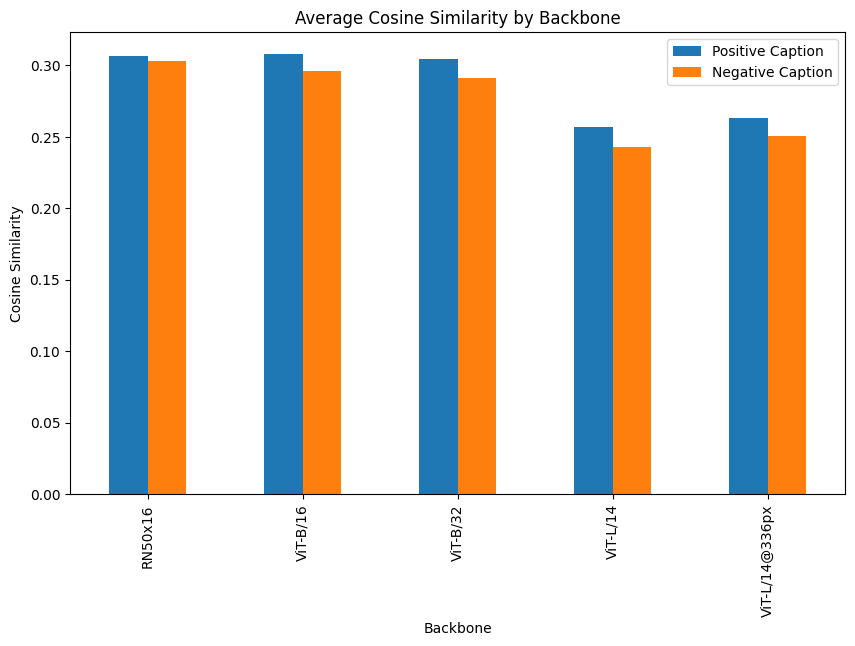

In [ ]:
# 백본별 평균 유사도 비교
summary[['positive_mean', 'negative_mean']].plot(kind='bar', figsize=(10, 6))
plt.title("Average Cosine Similarity by Backbone")
plt.ylabel("Cosine Similarity")
plt.xlabel("Backbone")
plt.legend(["Positive Caption", "Negative Caption"])
plt.show()


<Figure size 1000x600 with 0 Axes>

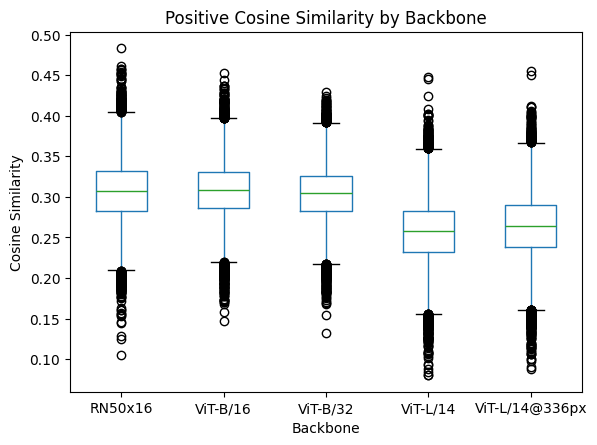

<Figure size 1000x600 with 0 Axes>

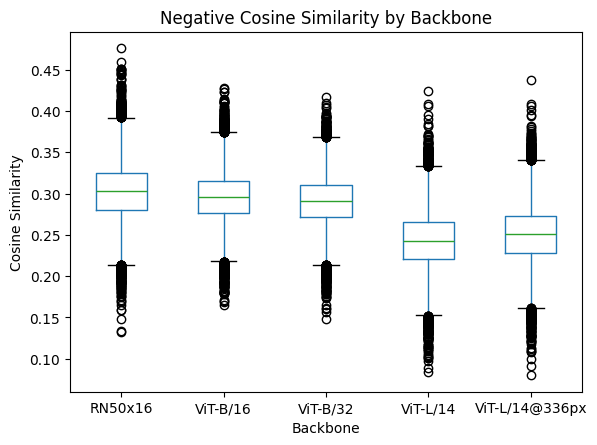

In [ ]:
# Positive Similarity 박스 플롯
plt.figure(figsize=(10, 6))
results.boxplot(column='positive_similarity', by='backbone', grid=False)
plt.title("Positive Cosine Similarity by Backbone")
plt.suptitle("")
plt.xlabel("Backbone")
plt.ylabel("Cosine Similarity")
plt.show()

# Negative Similarity 박스 플롯
plt.figure(figsize=(10, 6))
results.boxplot(column='negative_similarity', by='backbone', grid=False)
plt.title("Negative Cosine Similarity by Backbone")
plt.suptitle("")
plt.xlabel("Backbone")
plt.ylabel("Cosine Similarity")
plt.show()


backbone
RN50x16           0.003846
ViT-B/16          0.011781
ViT-B/32          0.013212
ViT-L/14          0.014154
ViT-L/14@336px    0.012671
Name: similarity_diff, dtype: float64


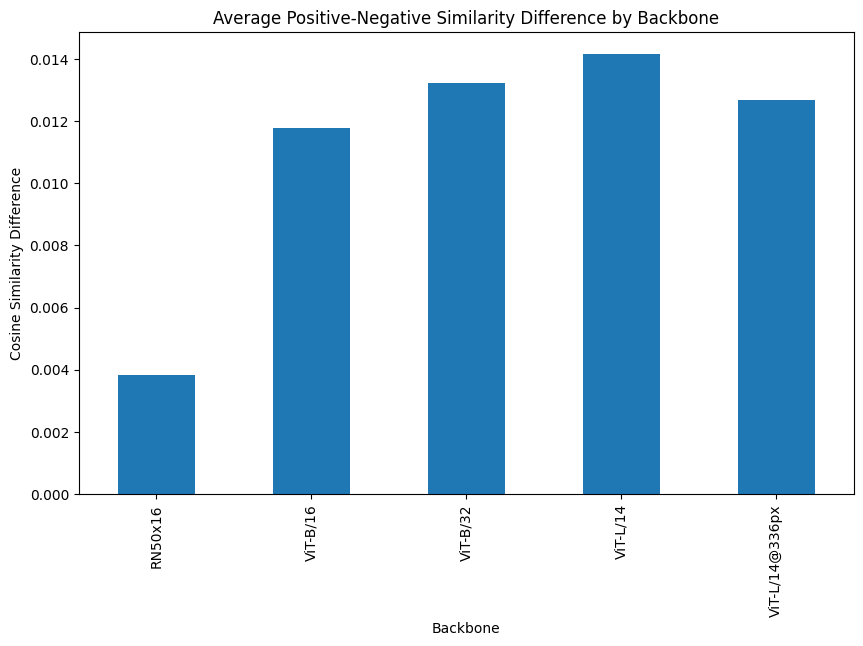

In [ ]:
# Positive-Negative 차이 계산
results['similarity_diff'] = results['positive_similarity'] - results['negative_similarity']

# 평균 차이 확인
diff_summary = results.groupby('backbone')['similarity_diff'].mean()
print(diff_summary)

# 시각화
diff_summary.plot(kind='bar', figsize=(10, 6))
plt.title("Average Positive-Negative Similarity Difference by Backbone")
plt.ylabel("Cosine Similarity Difference")
plt.xlabel("Backbone")
plt.show()


### 행렬 변환 후 전체에 대한 similarity 계산

In [ ]:
import os
import random
import torch
import clip
from PIL import Image
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbones = ["ViT-B/32", "ViT-B/16", "RN50x16", "ViT-L/14", "ViT-L/14@336px"]

# JSON 파일 및 이미지 디렉토리 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'

# JSON 데이터 로드
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 데이터 샘플링 (500개 무작위 선택)
random.seed(42)  # 동일한 샘플링 결과를 얻기 위해 시드 고정
annotations_sampled = random.sample(annotations, min(500, len(annotations)))

# 백본별 처리
for backbone in backbones:
    print(f"Processing backbone: {backbone}")
    model, preprocess = clip.load(backbone, device=device)

    # 이미지 및 텍스트 인코딩 저장
    image_features_list = []
    text_features_list = []
    image_ids = []

    # 모든 이미지와 텍스트 인코딩 (샘플링된 300개 데이터만 사용)
    for ann in tqdm(annotations_sampled, total=len(annotations_sampled)):
        # 이미지 경로 생성
        image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")
        if not os.path.exists(image_path):
            print(f"File not found: {image_path}")
            continue

        # 이미지 로드 및 전처리
        image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
        positive_caption = ann['positive_caption']
        text_token = clip.tokenize([positive_caption]).to(device)

        with torch.no_grad():
            # 인코딩
            image_features = model.encode_image(image)
            text_features = model.encode_text(text_token)

            # 정규화
            image_features /= image_features.norm(dim=-1, keepdim=True)
            text_features /= text_features.norm(dim=-1, keepdim=True)

            # 저장
            image_features_list.append(image_features.cpu().numpy())
            text_features_list.append(text_features.cpu().numpy())
            image_ids.append(ann['image_id'])

    # 배열로 변환
    image_features_array = np.vstack(image_features_list)
    text_features_array = np.vstack(text_features_list)

    # 유사도 행렬 계산
    similarity_matrix = np.dot(image_features_array, text_features_array.T)

    # 유사도 행렬 시각화
    plt.figure(figsize=(12, 10))
    sns.heatmap(similarity_matrix, cmap="viridis")
    plt.title(f"Similarity Matrix: Images vs Positive Texts ({backbone})")
    plt.xlabel("Texts")
    plt.ylabel("Images")
    plt.savefig(f"similarity_matrix_{backbone.replace('/', '_')}.png")  # 히트맵 저장
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 부정문에 대한 similarity
for backbone in backbones:
    print(f"Processing backbone: {backbone}")
    model, preprocess = clip.load(backbone, device=device)

    # 이미지 및 텍스트 인코딩 저장
    image_features_list = []
    neg_text_features_list = []
    image_ids = []

    # 모든 이미지와 텍스트 인코딩 (샘플링된 300개 데이터만 사용)
    for ann in tqdm(annotations_sampled, total=len(annotations_sampled)):
        # 이미지 경로 생성
        image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")
        if not os.path.exists(image_path):
            print(f"File not found: {image_path}")
            continue

        # 이미지 로드 및 전처리
        image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
        negative_caption = ann['negative_caption']
        neg_text_token = clip.tokenize([negative_caption]).to(device)

        with torch.no_grad():
            # 인코딩
            image_features = model.encode_image(image)
            neg_text_features = model.encode_text(neg_text_token)

            # 정규화
            image_features /= image_features.norm(dim=-1, keepdim=True)
            neg_text_features /= neg_text_features.norm(dim=-1, keepdim=True)

            # 저장
            image_features_list.append(image_features.cpu().numpy())
            neg_text_features_list.append(neg_text_features.cpu().numpy())
            image_ids.append(ann['image_id'])

    # 배열로 변환
    image_features_array = np.vstack(image_features_list)
    neg_text_features_array = np.vstack(neg_text_features_list)

    # 유사도 행렬 계산
    similarity_matrix_neg = np.dot(image_features_array, neg_text_features_array.T)

    # 유사도 행렬 시각화
    plt.figure(figsize=(12, 10))
    sns.heatmap(similarity_matrix_neg, cmap="viridis")
    plt.title(f"Similarity Matrix: Images vs Negative Texts ({backbone})")
    plt.xlabel("Texts")
    plt.ylabel("Images")
    plt.savefig(f"similarity_matrix_{backbone.replace('/', '_')}.png")  # 히트맵 저장
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

## 부정문의 종류 별 similarity 차이

###  이미지-텍스트 매칭 결과 시각화

In [ ]:
import torch
import clip
from PIL import Image
from tqdm import tqdm
import pandas as pd

# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "ViT-B/16"

# JSON 파일 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'

# JSON 데이터 로드
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 모델 및 전처리기 로드
print(f"Processing backbone: {backbone}")
model, preprocess = clip.load(backbone, device=device)

# 결과 저장
similarities = []
for ann in tqdm(annotations, total=len(annotations)):
    # 이미지 경로 생성
    image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")

    # 파일 확인
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    # 이미지 로드 및 전처리
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # 텍스트 준비
    positive_caption = ann['positive_caption']
    negative_caption = ann['negative_caption']
    text_tokens = clip.tokenize([positive_caption, negative_caption]).to(device)

    with torch.no_grad():
        # CLIP 인코딩
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_tokens)

        # 벡터 정규화
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        positive_similarity = (image_features @ text_features[0].unsqueeze(0).T).item()
        negative_similarity = (image_features @ text_features[1].unsqueeze(0).T).item()

    similarities.append({
        "image_id": ann["image_id"],
        "positive_caption": positive_caption,
        "negative_caption": negative_caption,
        "positive_similarity": positive_similarity,
        "negative_similarity": negative_similarity
    })

# 결과 저장
df = pd.DataFrame(similarities)
output_path = f"clip_cosine_similarity_results_{backbone.replace('/', '_')}.json"
df.to_json(output_path, orient='records', indent=4)
print(f"Results saved to {output_path}")


Processing backbone: ViT-B/16


100%|██████████| 25014/25014 [12:39<00:00, 32.95it/s]


Results saved to clip_cosine_similarity_results_ViT-B_16.json


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# 상위 10개 결과 확인 (Positive vs Negative)
top_results = similarities[:10]

for result in top_results:
    image_path = os.path.join(image_folder, f"{int(result['image_id']):012d}.jpg")
    image = Image.open(image_path)

    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Image ID: {result['image_id']}")

    # 캡션과 유사도 표시
    plt.figtext(0.5, 0.01, f"Positive Caption: {result['positive_caption']} (Similarity: {result['positive_similarity']:.2f})",
                wrap=True, horizontalalignment='center', fontsize=10)
    plt.figtext(0.5, -0.05, f"Negative Caption: {result['negative_caption']} (Similarity: {result['negative_similarity']:.2f})",
                wrap=True, horizontalalignment='center', fontsize=10)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df['similarity_diff'] = df['positive_similarity'] - df['negative_similarity']
sorted_results = df.sort_values(by='similarity_diff', ascending=False)

# 상위/하위 결과 확인
top_positive_diff = sorted_results.head(5)
top_negative_diff = sorted_results.tail(5)

def plot_results(results, title):
    for _, row in results.iterrows():
        image_path = os.path.join(image_folder, f"{int(row['image_id']):012d}.jpg")
        image = Image.open(image_path)

        plt.figure(figsize=(8, 6))
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Image ID: {row['image_id']}\n{title}")

        plt.figtext(0.5, 0.01, f"Positive Caption: {row['positive_caption']} (Similarity: {row['positive_similarity']:.2f})",
                    wrap=True, horizontalalignment='center', fontsize=10)
        plt.figtext(0.5, -0.05, f"Negative Caption: {row['negative_caption']} (Similarity: {row['negative_similarity']:.2f})",
                    wrap=True, horizontalalignment='center', fontsize=10)
        plt.show()


plot_results(top_positive_diff, "Top Positive Differences")
plot_results(top_negative_diff, "Top Negative Differences")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
failure_cases = df[df['positive_similarity'] < df['negative_similarity']]
print(failure_cases.shape[0])

4789


### 임베딩 및 negative 결과 확인


In [ ]:
import os
import torch
import clip
from PIL import Image
from tqdm import tqdm
import numpy as np

# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "ViT-B/16"  # 사용하려는 CLIP backbone
model, preprocess = clip.load(backbone, device=device)

# JSON 파일 및 이미지 디렉토리 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'

# JSON 데이터 로드
import json
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 샘플링
import random
annotations_sampled = random.sample(annotations, 2000)

# 결과 저장
image_features_list = []
text_features_positive_list = []
text_features_negative_list = []

# 모든 이미지와 텍스트에 대해 인코딩
for ann in tqdm(annotations_sampled, total=len(annotations_sampled)):
    # 이미지 경로 생성
    image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    # 이미지 로드 및 전처리
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # 텍스트 준비
    positive_caption = ann['positive_caption']
    negative_caption = ann['negative_caption']
    text_positive = clip.tokenize([positive_caption]).to(device)
    text_negative = clip.tokenize([negative_caption]).to(device)

    with torch.no_grad():
        # 이미지와 텍스트 인코딩
        image_features = model.encode_image(image)
        text_features_positive = model.encode_text(text_positive)
        text_features_negative = model.encode_text(text_negative)

        # 정규화
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features_positive /= text_features_positive.norm(dim=-1, keepdim=True)
        text_features_negative /= text_features_negative.norm(dim=-1, keepdim=True)

        # 저장
        image_features_list.append(image_features.cpu().numpy())
        text_features_positive_list.append(text_features_positive.cpu().numpy())
        text_features_negative_list.append(text_features_negative.cpu().numpy())

# 배열로 변환
image_features_array = np.vstack(image_features_list)
text_features_array_p = np.vstack(text_features_positive_list)
text_features_array_n = np.vstack(text_features_negative_list)

print("Image features shape:", image_features_array.shape)
print("Text-positive features shape:", text_features_array_p.shape)
print("Text-negative features shape:", text_features_array_n.shape)


100%|██████████| 2000/2000 [01:19<00:00, 25.28it/s]

Image features shape: (2000, 512)
Text-positive features shape: (2000, 512)
Text-negative features shape: (2000, 512)


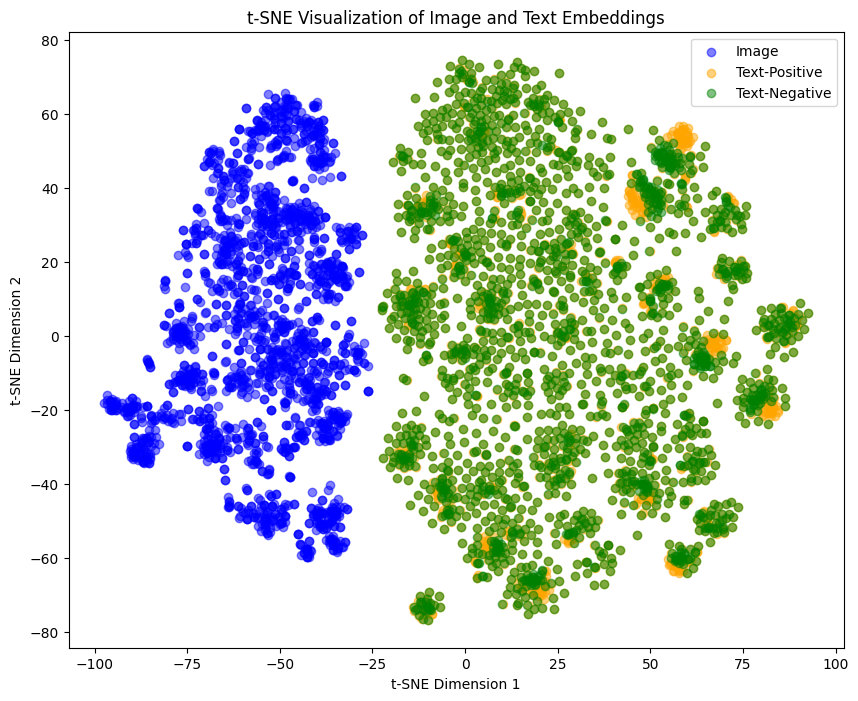

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 데이터 준비
embeddings = np.concatenate([image_features_array, text_features_array_p, text_features_array_n])
labels = ['Image'] * len(image_features_array) + ['Text-Positive'] * len(text_features_array_p) + ['Text-Negative'] * len(text_features_array_n)

# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# 시각화
plt.figure(figsize=(10, 8))
for i, label in enumerate(labels):
    if label == 'Image':
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], color='blue', alpha=0.5, label='Image' if 'Image' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif label == 'Text-Positive':
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], color='orange', alpha=0.5, label='Text-Positive' if 'Text-Positive' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], color='green', alpha=0.5, label='Text-Negative' if 'Text-Negative' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.title("t-SNE Visualization of Image and Text Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


### 프롬프팅을 통한 부정문 처리 개선

In [ ]:
import torch
import clip
from PIL import Image
import os

# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "ViT-B/16"
model, preprocess = clip.load(backbone, device=device)

# 테스트 이미지 경로
image_path = './coco_dataset/val2017/000000255965.jpg'  # 임의 이미지 선택
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

# 프롬프트 설계
prompts = [
    "A cat with white stomach takes a pose",  # 긍정 문장 1
    "This is a cat with white stomach takes a pose", # 긍정 문장 2
    "This is not a cat with white stomach takes a pose.",  # 기본 부정 문장1
    "Not a cat with white stomach takes a pose.",  # 기본 부정 문장2
    "There is absolutely no cat with white stomach takes a pose.",  # 부정 의미 강화
    "There is a dog with white stomach takes a pose.", # 부정 의미 포함
    "This is not a cat with white stomach takes a pose; it is something else entirely, such as a cat or a bird."  # 구체적 부정 문장
]
promts_similarity = []
# 텍스트 토큰화 및 인코딩
text_tokens = clip.tokenize(prompts).to(device)

with torch.no_grad():
    # 이미지 및 텍스트 인코딩
    image_features = model.encode_image(image)
    text_features = model.encode_text(text_tokens)

    # 벡터 정규화
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # 유사도 계산
    similarities = (image_features @ text_features.T).squeeze(0).cpu().numpy()

# 결과 출력
for prompt, similarity in zip(prompts, similarities):
    print(f"Prompt: {prompt}")
    print(f"Similarity: {similarity:.4f}")
    print("-" * 50)


Prompt: A cat with white stomach takes a pose
Similarity: 0.2776
--------------------------------------------------
Prompt: This is a cat with white stomach takes a pose
Similarity: 0.2749
--------------------------------------------------
Prompt: This is not a cat with white stomach takes a pose.
Similarity: 0.2847
--------------------------------------------------
Prompt: Not a cat with white stomach takes a pose.
Similarity: 0.2651
--------------------------------------------------
Prompt: There is absolutely no cat with white stomach takes a pose.
Similarity: 0.2625
--------------------------------------------------
Prompt: There is a dog with white stomach takes a pose.
Similarity: 0.2124
--------------------------------------------------
Prompt: This is not a cat with white stomach takes a pose; it is something else entirely, such as a cat or a bird.
Similarity: 0.2954
--------------------------------------------------


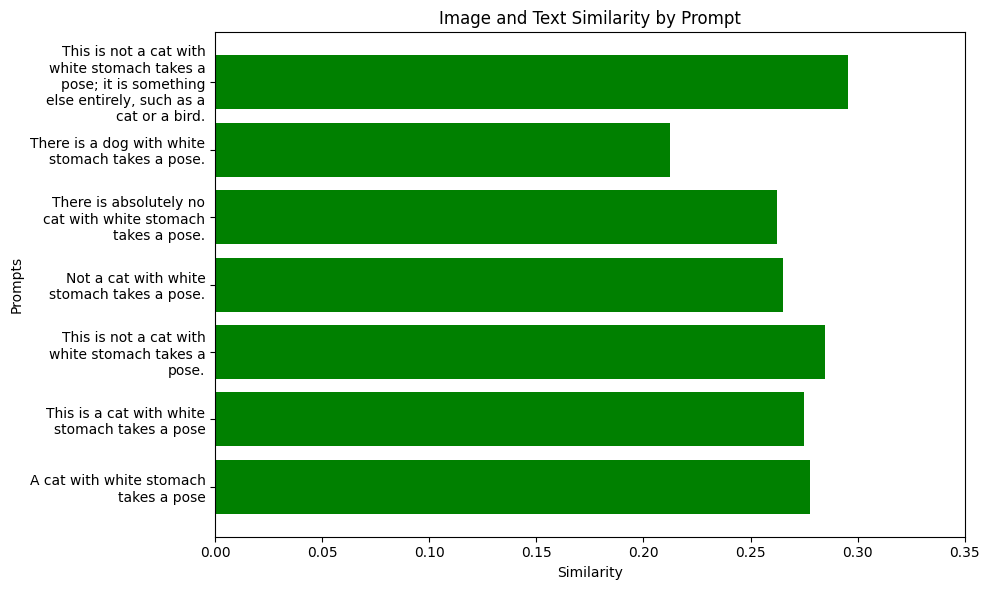

In [ ]:
import matplotlib.pyplot as plt
from textwrap import wrap

wrapped_prompts = ["\n".join(wrap(prompt, width=25)) for prompt in prompts]

plt.figure(figsize=(10, 6))
plt.barh(wrapped_prompts, similarities, color='green')
plt.xlabel("Similarity")
plt.ylabel("Prompts")
plt.title("Image and Text Similarity by Prompt")
plt.xlim(0, 0.35)  # 유사도 범위 설정 (0~0.35)
plt.tight_layout()
plt.show()

In [ ]:
image_path = './coco_dataset/val2017/000000179765.jpg'  # 임의 이미지 선택
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

# 프롬프트 설계
prompts = [
    "A black Honda motorcycle parked in front of a garage.",  # 긍정 문장 1
    "This is a black Honda motorcycle parked in front of a garage.", # 긍정 문장 2
    "This is not a black Honda motorcycle parked in front of a garage.",  # 기본 부정 문장1
    "Not a black Honda motorcycle parked in front of a garage.",  # 기본 부정 문장2
    "There is absolutely no a black Honda motorcycle parked in front of a garage.",  # 부정 의미 강화
    "There is a black Honda car parked in front of a garage.", # 부정 의미 포함
    "This is not a black Honda motorcycle parked in front of a garage.; it is something else entirely, such as a car or a plane."  # 구체적 부정 문장
]
promts_similarity = []

text_tokens = clip.tokenize(prompts).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text_tokens)

    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    similarities = (image_features @ text_features.T).squeeze(0).cpu().numpy()

for prompt, similarity in zip(prompts, similarities):
    print(f"Prompt: {prompt}")
    print(f"Similarity: {similarity:.4f}")
    print("-" * 50)


Prompt: A black Honda motorcycle parked in front of a garage.
Similarity: 0.2981
--------------------------------------------------
Prompt: This is a black Honda motorcycle parked in front of a garage.
Similarity: 0.2876
--------------------------------------------------
Prompt: This is not a black Honda motorcycle parked in front of a garage.
Similarity: 0.2847
--------------------------------------------------
Prompt: Not a black Honda motorcycle parked in front of a garage.
Similarity: 0.2810
--------------------------------------------------
Prompt: There is absolutely no a black Honda motorcycle parked in front of a garage.
Similarity: 0.2849
--------------------------------------------------
Prompt: There is a black Honda car parked in front of a garage.
Similarity: 0.2109
--------------------------------------------------
Prompt: This is not a black Honda motorcycle parked in front of a garage.; it is something else entirely, such as a car or a plane.
Similarity: 0.3081
--------

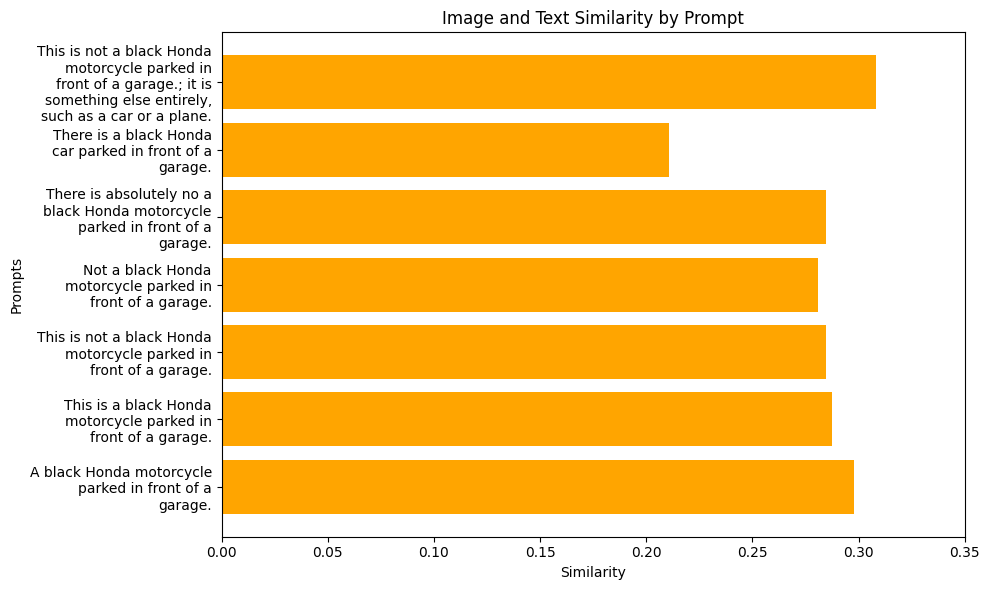

In [ ]:
import matplotlib.pyplot as plt
from textwrap import wrap

wrapped_prompts = ["\n".join(wrap(prompt, width=25)) for prompt in prompts]

plt.figure(figsize=(10, 6))
plt.barh(wrapped_prompts, similarities, color='orange')
plt.xlabel("Similarity")
plt.ylabel("Prompts")
plt.title("Image and Text Similarity by Prompt")
plt.xlim(0, 0.35)  # 유사도 범위 설정 (0~0.35)
plt.tight_layout()
plt.show()